# 911 Calls Analysis
Exploratory Data Analysis workflow project

## Set-up

Import required libraries

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read in the data file and familiriaside with its structure

In [96]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Explore some basic questions about the data

What are the top 5 zipcodes for 911 calls?

In [126]:
zip_pop = df['zip'].value_counts().head(5)

print("The top 5 zipcodes for 911 calls are:")
for i, (zipcode,count) in enumerate(zip_pop.items(), start = 1):
    print(f"{i}. {int(zipcode)} with {count} calls")


The top 5 zipcodes for 911 calls are:
1. 19401 with 6979 calls
2. 19464 with 6643 calls
3. 19403 with 4854 calls
4. 19446 with 4748 calls
5. 19406 with 3174 calls


What are the top 5 townships for 911 calls?

In [127]:
twp_pop = df['twp'].value_counts().head(5)

print("The top 5 townships for 911 calls are:")
for i, (twp,count) in enumerate(twp_pop.items(), start = 1):
    print(f"{i}. {twp} with {count} calls")

The top 5 townships for 911 calls are:
1. LOWER MERION with 8443 calls
2. ABINGTON with 5977 calls
3. NORRISTOWN with 5890 calls
4. UPPER MERION with 5227 calls
5. CHELTENHAM with 4575 calls


How many unique titles are there in the title codes column?

In [100]:
df['title'].head(10)

0         EMS: BACK PAINS/INJURY
1        EMS: DIABETIC EMERGENCY
2            Fire: GAS-ODOR/LEAK
3         EMS: CARDIAC EMERGENCY
4                 EMS: DIZZINESS
5               EMS: HEAD INJURY
6           EMS: NAUSEA/VOMITING
7     EMS: RESPIRATORY EMERGENCY
8          EMS: SYNCOPAL EPISODE
9    Traffic: VEHICLE ACCIDENT -
Name: title, dtype: object

In [101]:
print(f"There are {len(df['title'].unique())} unique titles")

There are 110 unique titles


In the title column we have reasons/department (e.g., Traffic) and description (e.g., Vehicle accident). Lets create a new column with the reason so we can explore further the main reasons for 911 calls

## Explore different aspects of the 911 calls including reasons and temporal patterns

In [102]:
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

Now explore the most common reasons to call 911

The top 5 reasons for 911 calls are:
1. EMS with 48877 calls
2. Traffic with 35695 calls
3. Fire with 14920 calls


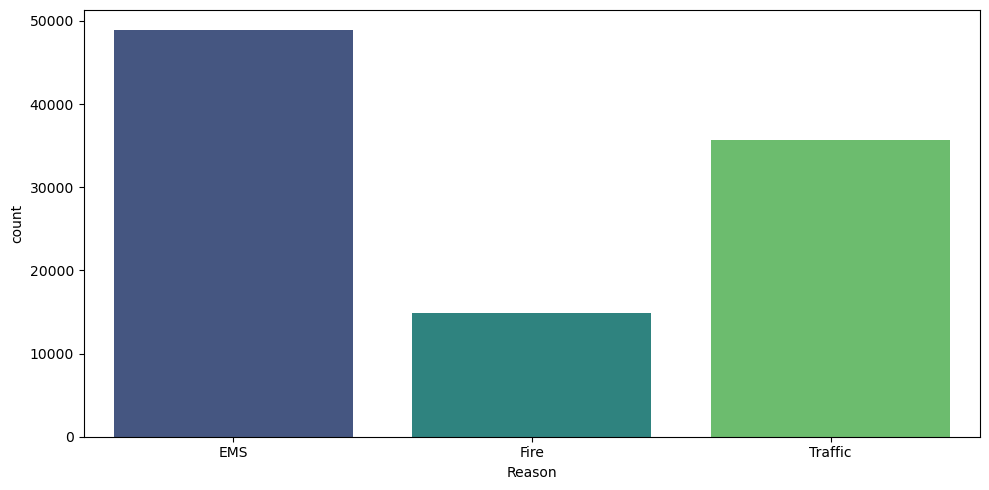

In [129]:
top_reasons = df['Reason'].value_counts()

print("The top 5 reasons for 911 calls are:")
for i, (reason,count) in enumerate(top_reasons.items(), start = 1):
    print(f"{i}. {reason} with {count} calls")
    
plt.figure(figsize=(10,5))
sns.countplot(x = 'Reason', data = df, hue = 'Reason', palette = 'viridis')
plt.tight_layout()
plt.show()

Let's work with time information. The column timeStamp contains this information but we need to make sure that it is a time object, so let's check the object time of that column and transform it to Datetime if needed.

In [104]:
type(df['timeStamp'][0])

str

In [105]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [106]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

Now that we have our timeStamp column in the right format, lets create 3 new columns with Hour, Month and Day of the Week

In [107]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Hour'].head()

0    17
1    17
2    17
3    17
4    17
Name: Hour, dtype: int64

In [108]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [109]:
df['Dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['Dayofweek'].unique() # Note that Monday is 0 and Sunday is 6

array([3, 4, 5, 6, 0, 1, 2])

In [110]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Dayofweek'] = df['Dayofweek'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


Lets explore now the number of calls across day of the week and month based on the reason

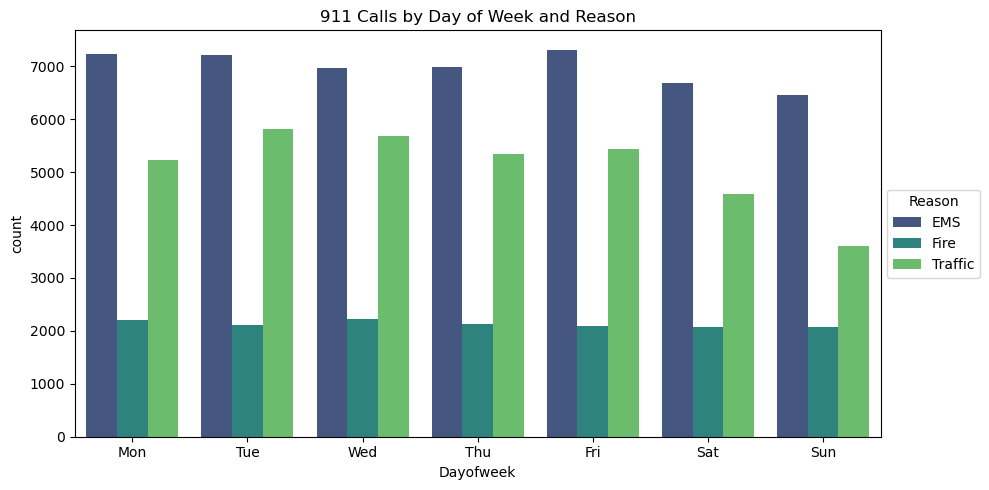

In [130]:
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,5))
sns.countplot(x = 'Dayofweek', data = df, hue = 'Reason', palette = 'viridis', order = days_order)
plt.legend(title='Reason', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('911 Calls by Day of Week and Reason')
plt.tight_layout()
plt.show()

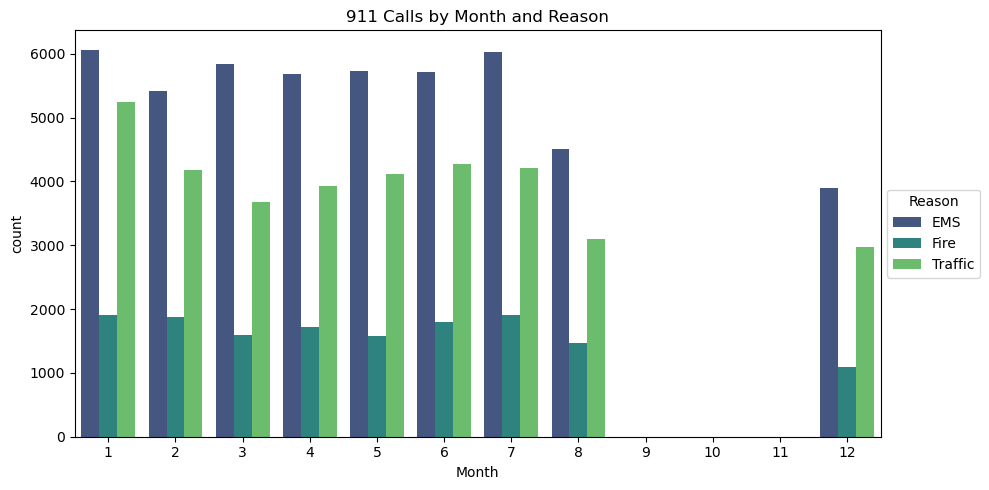

In [131]:
days_order = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(figsize=(10,5))
sns.countplot(x = 'Month', data = df, hue = 'Reason', palette = 'viridis', order = days_order)
plt.legend(title='Reason', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('911 Calls by Month and Reason')
plt.tight_layout()
plt.show()

We see some missing info for some months (September, October and November). Let's try to fill this information by shifting the visualisation approach

In [122]:
bymonth = df.groupby('Month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Dayofweek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


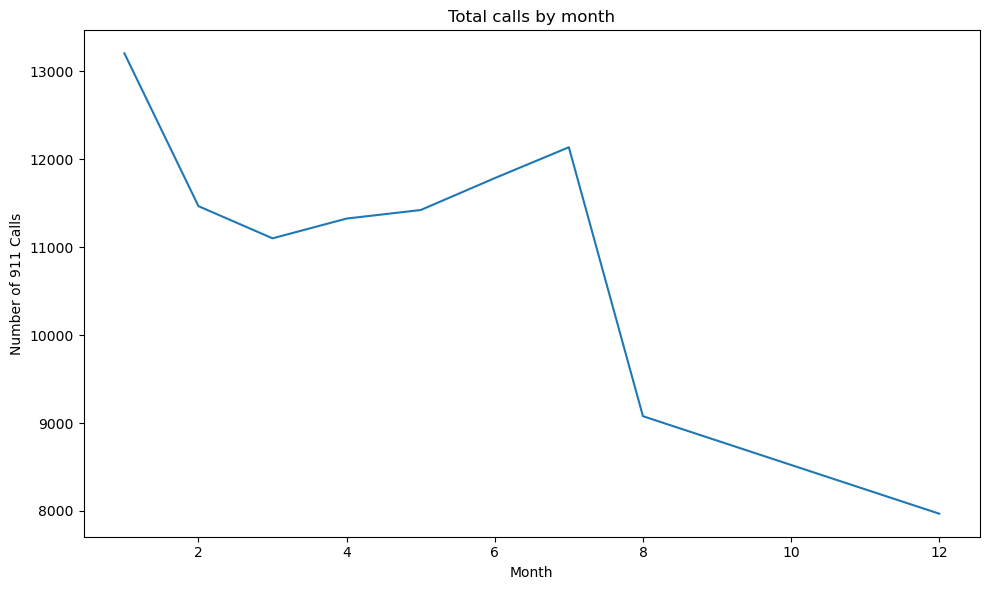

In [125]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Month', y = 'Reason', data = bymonth)
plt.title('Total calls by month')
plt.ylabel('Number of 911 Calls') 
plt.tight_layout()
plt.show()

Let's explore a potential trend in the monthly number of calls

In [135]:
bymonth = bymonth.reset_index() # we need to resent the index after group by
bymonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Dayofweek
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Figure size 1000x600 with 0 Axes>

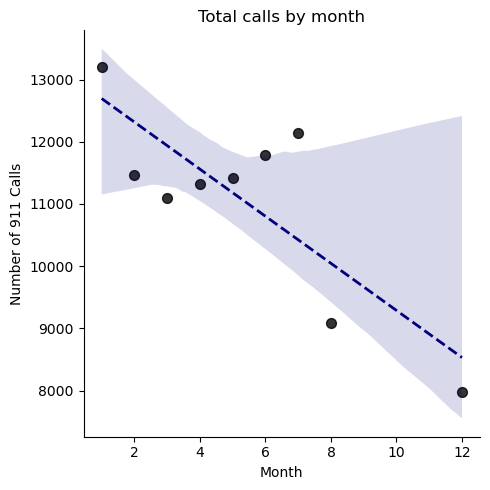

In [146]:
plt.figure(figsize=(10,6))
sns.lmplot(x = 'Month', y = 'Reason', data = bymonth,
          scatter_kws={'color': 'black', 's': 50},
          line_kws={'color': 'navy', 'linewidth': 2, 'linestyle':'--'})
plt.title('Total calls by month')
plt.ylabel('Number of 911 Calls') 
plt.tight_layout()
plt.show()

Now, I will explore the dates in a bit more detail

In [149]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [154]:
bydate = df.groupby('Date').count()

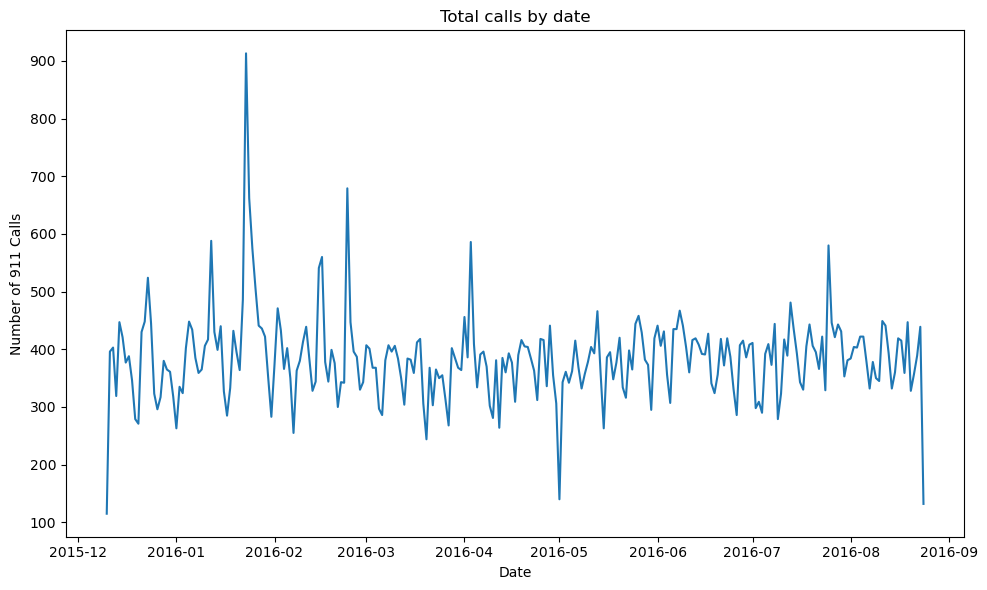

In [155]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Date', y = 'Reason', data = bydate)
plt.title('Total calls by date')
plt.ylabel('Number of 911 Calls') 
plt.tight_layout()
plt.show()

Let's separate this plot by reasons now, so we can have greater detail and compare them. This will allow analyse what reason is actually driving the call density pattern.

In [171]:
# Group once for all reasons
bydate = df.groupby(['Reason', 'Date']).count().reset_index()
bydate.head()

,Reason,Date,index,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Dayofweek
0,EMS,2015-12-10,57,57,57,57,52,57,57,57,57,57,57,57,57
1,EMS,2015-12-11,186,186,186,186,166,186,186,186,186,186,186,186,186
2,EMS,2015-12-12,189,189,189,189,171,189,189,189,189,189,189,189,189
3,EMS,2015-12-13,190,190,190,190,178,190,190,190,190,190,190,190,190
4,EMS,2015-12-14,222,222,222,222,201,222,222,222,222,222,222,222,222


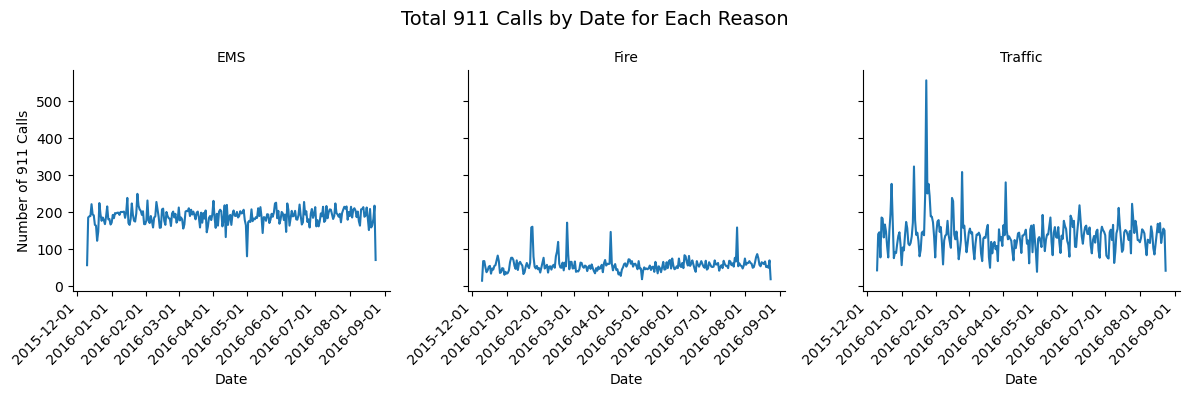

In [173]:
# Plot with one panel per Reason
g = sns.FacetGrid(bydate, col='Reason', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.lineplot, x='Date', y='twp')  # or any numeric column representing counts

g.set_titles("{col_name}")  # each panel labeled by Reason
g.set_axis_labels("Date", "Number of 911 Calls")
g.set_xticklabels(rotation=45, ha='right')
g.fig.suptitle("Total 911 Calls by Date for Each Reason", fontsize=14)
plt.tight_layout()
plt.show()

911 calls are often more common about trafic reasons, followed by EMS and finally Fire. We can appeciate clear peaks and valleys in the data with specially bad months for traffic related calls early 2016

Next, I want to create a heatmap of hour and day of the week to better understand the temporal call clusters

In [197]:
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['Dayofweek'] = pd.Categorical(df['Dayofweek'], categories=days_order, ordered=True)

In [198]:
heat_df = df.groupby(['Dayofweek', 'Hour']).count()
heat_df.head()

/var/folders/vx/4t7xz04d6_39xszmh_6hq4br0000gn/T/ipykernel_5328/1888750514.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heat_df = df.groupby(['Dayofweek', 'Hour']).count()


index  lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Dayofweek Hour                                                                 
Mon       0       282  282  282   282  243    282        282  282   282  282   
          1       221  221  221   221  198    221        221  220   221  221   
          2       201  201  201   201  183    201        201  201   201  201   
          3       194  194  194   194  173    194        194  194   194  194   
          4       204  204  204   204  185    204        204  204   203  204   

                Reason  Month  Date  
Dayofweek Hour                       
Mon       0        282    282   282  
          1        221    221   221  
          2        201    201   201  
          3        194    194   194  
          4        204    204   204

In [199]:
heat_df = heat_df['Reason'].unstack()
heat_df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


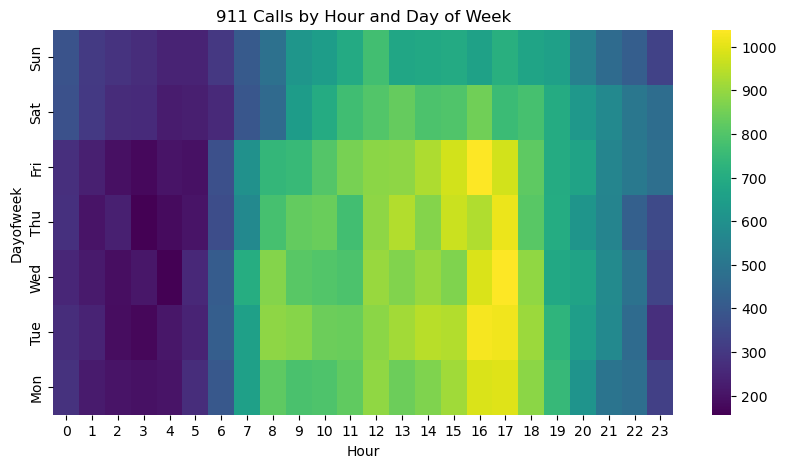

In [200]:
plt.figure(figsize=(10,5))
sns.heatmap(heat_df,cmap='viridis')
plt.gca().invert_yaxis()
plt.title('911 Calls by Hour and Day of Week')
plt.show()

We can clearly see how the mayority of calls are produced during the day time and they peak in the afternoon between 4-5 pm. Overall the number of calls decline over the weekends

<Figure size 1000x500 with 0 Axes>

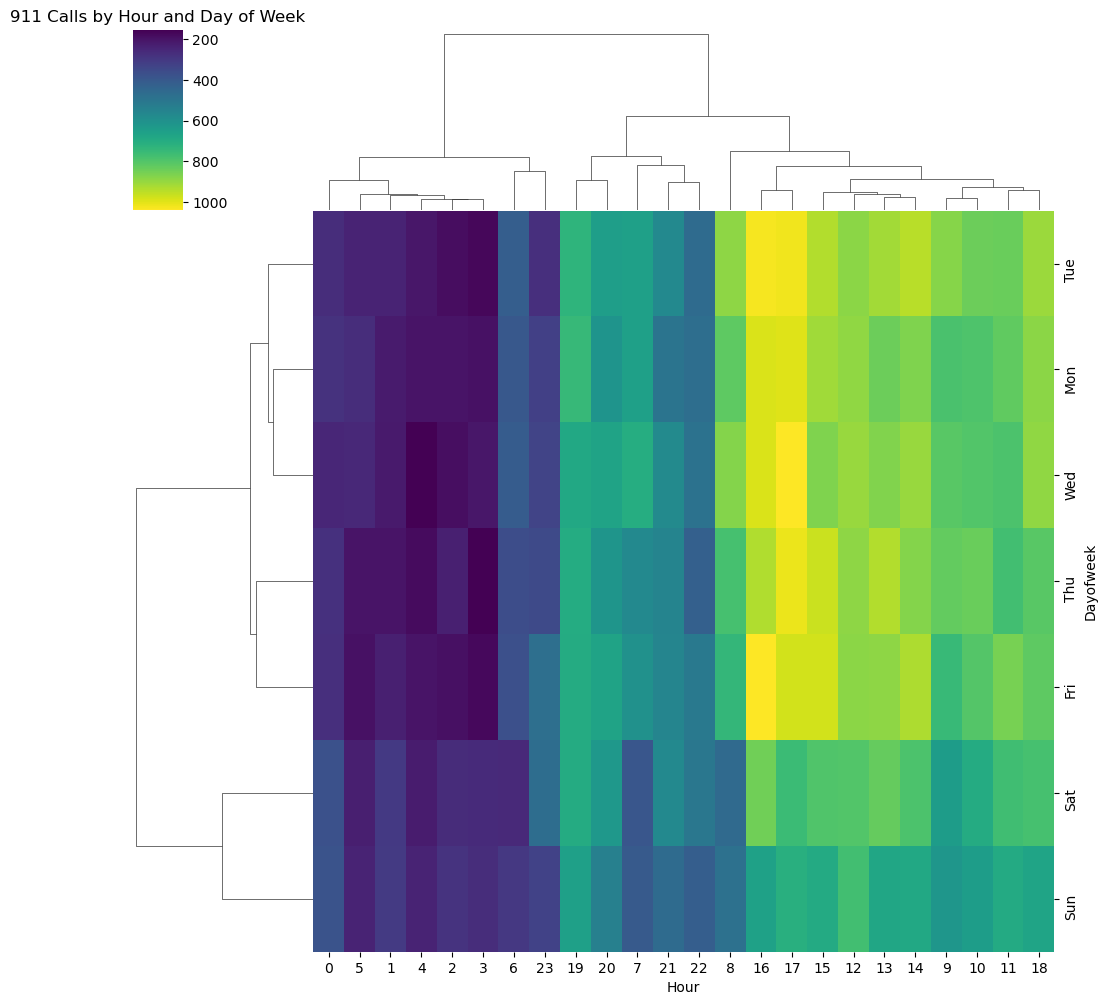

In [201]:
plt.figure(figsize=(10,5))
sns.clustermap(heat_df,cmap='viridis')
plt.gca().invert_yaxis()
plt.title('911 Calls by Hour and Day of Week')
plt.show()

The cluster plot shows the above pattern even clearer, with daytime being at the left of the plot and weekends being at the bottom

We can do the same now but showing month instead of hour

In [203]:
heat_df_month = df.groupby(['Dayofweek', 'Month']).count()
heat_df_month = heat_df_month['Reason'].unstack()
heat_df_month.head()

/var/folders/vx/4t7xz04d6_39xszmh_6hq4br0000gn/T/ipykernel_5328/3551616031.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heat_df_month = df.groupby(['Dayofweek', 'Month']).count()


Month,1,2,3,4,5,6,7,8,12
Dayofweek,,,,,,,,,
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065


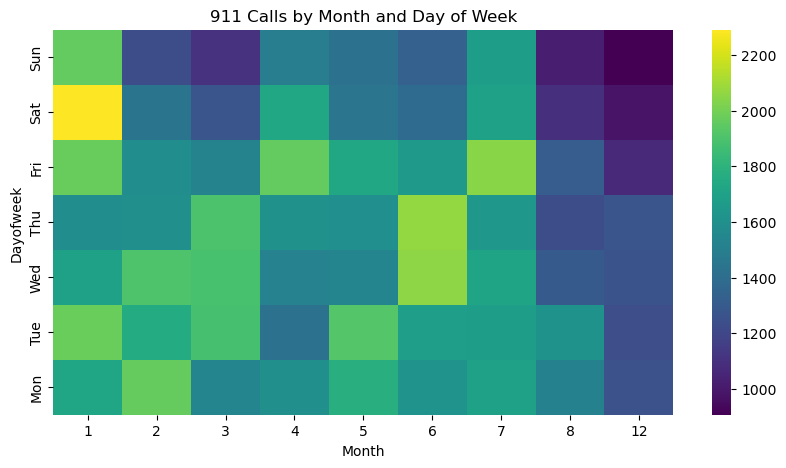

In [204]:
plt.figure(figsize=(10,5))
sns.heatmap(heat_df_month,cmap='viridis')
plt.gca().invert_yaxis()
plt.title('911 Calls by Month and Day of Week')
plt.show()

Calls seems to decline in december. Saturdays in January seem to have a peak in the number of calls

<Figure size 1000x500 with 0 Axes>

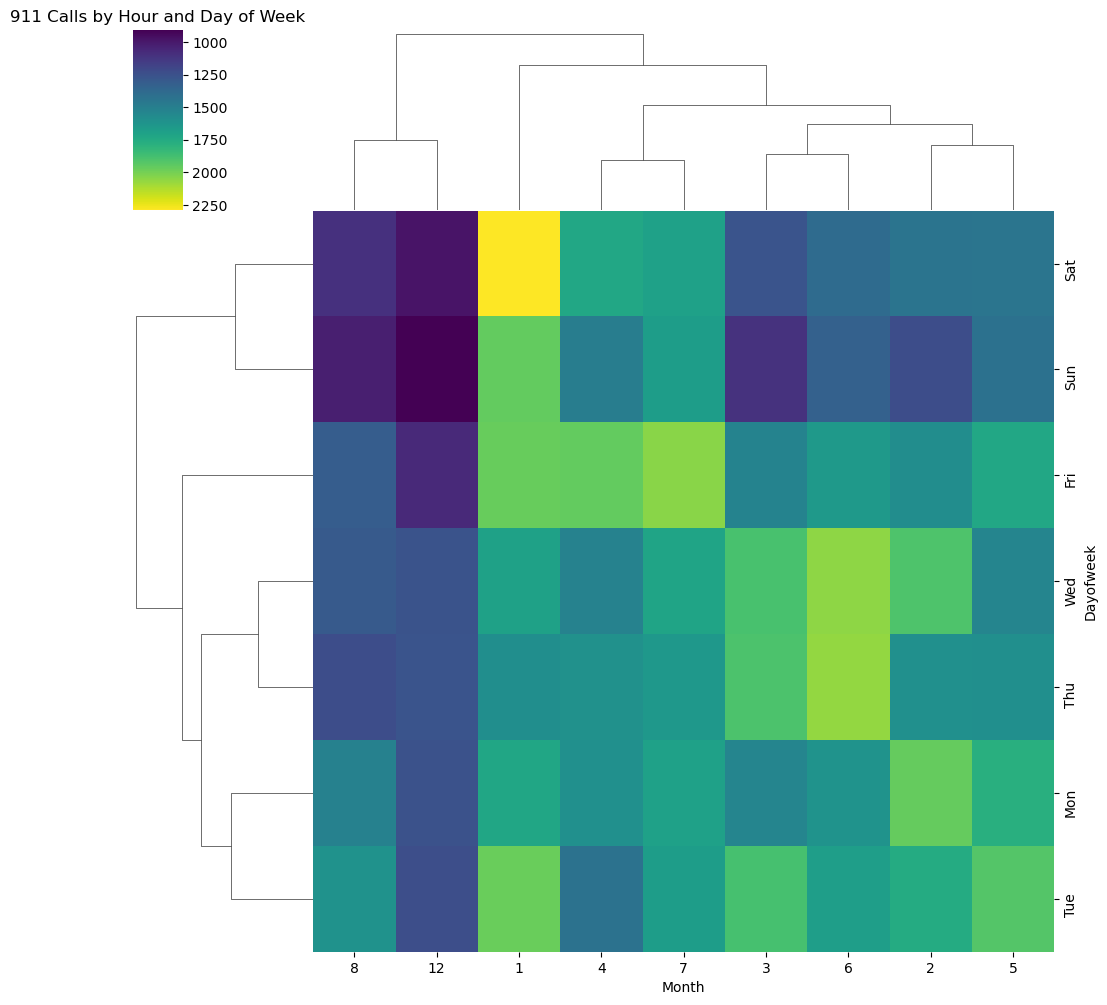

In [205]:
plt.figure(figsize=(10,5))
sns.clustermap(heat_df_month,cmap='viridis')
plt.gca().invert_yaxis()
plt.title('911 Calls by Hour and Day of Week')
plt.show()